In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [74]:
df = pd.read_csv('./datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.shape)

(891, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


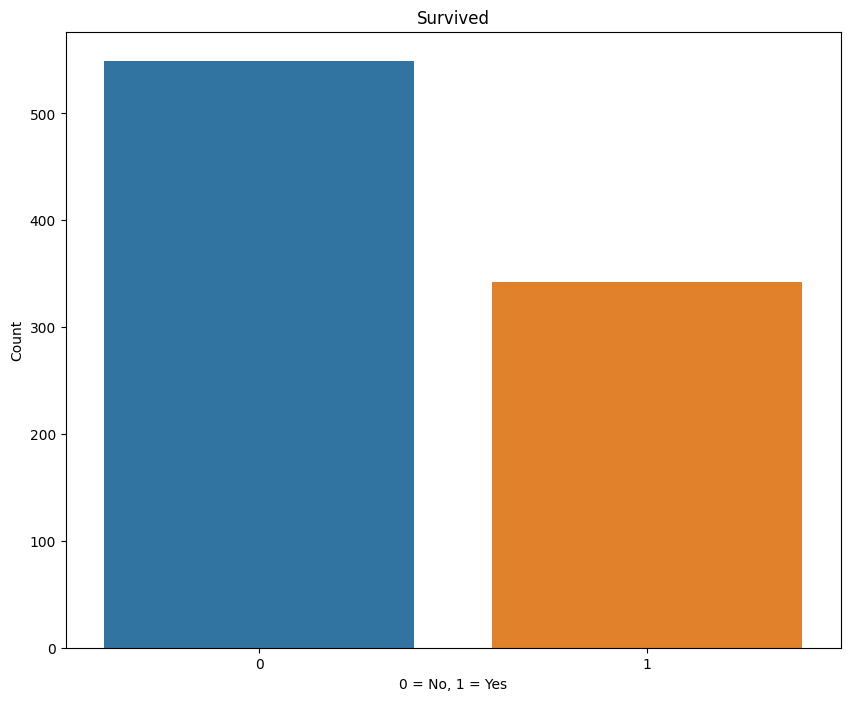

In [11]:
fig = plt.figure(figsize=(10,8))
sns.countplot(x='Survived', data=df)
plt.title('Survived')
plt.xlabel('0 = No, 1 = Yes')
plt.ylabel('Count')
plt.show()

In [34]:
survived = sum(df.Survived)
died = len(df.Survived) - survived
percentage = survived / len(df.Survived)
perc_died = died / len(df.Survived)

print('Survived: ', survived, ' Percentage: ', percentage)
print('Died: ', died, ' Percentage: ', perc_died)

Survived:  342  Percentage:  0.3838383838383838
Died:  549  Percentage:  0.6161616161616161


In [23]:
women = df[df.Sex == 'female']['Survived']
print(women.shape)
rate_women = sum(women)/len(women)
print('% of women who survived', rate_women)

(314,)
% of women who survived 0.7420382165605095


In [29]:
men = df[df.Sex == 'male']['Survived']
print(men.shape)
rate_men = sum(men)/len(men)
print('% of men who survived', rate_men)

(577,)
% of men who survived 0.18890814558058924


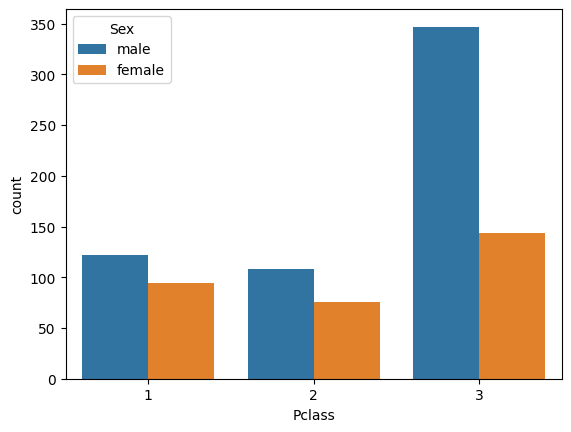

In [37]:
sns.countplot(x='Pclass', hue='Sex',data = df)
plt.show()  

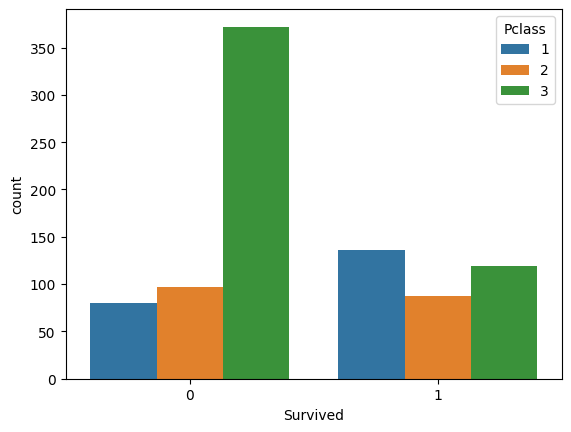

In [38]:
sns.countplot(x = 'Survived', hue='Pclass', data=df)
plt.show() # 3rd class passengers died the most and 1st class survived the most

##### Descartando datos no relevantes para el modelo

In [75]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'], axis=1)
df.head() 

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


Transformando la variable sexo

In [76]:
df.Sex = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


Fill null values

In [46]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [48]:
df.Embarked.isnull().sum()

2

In [77]:
common_value = 'S'
df.Embarked = df.Embarked.fillna(common_value)
df.Embarked.isnull().sum()

0

In [78]:
# Transformando Emberked em números
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in [df]:
    dataset.Embarked = dataset.Embarked.map(ports)

df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,0
1,1,1,0,1,0,71.2833,1
2,1,3,0,0,0,7.9250,0
3,1,1,0,1,0,53.1000,0
4,0,3,1,0,0,8.0500,0


In [79]:
for dataset in [df]:
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30),'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100),'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250),'Fare'] = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [80]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,0,0
1,1,1,0,1,0,3,1
2,1,3,0,0,0,0,0
3,1,1,0,1,0,3,0
4,0,3,1,0,0,0,0


In [81]:
x_features = df.drop('Survived', axis=1)
y_target = df['Survived']

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state = 42)

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [86]:
y_pred = model.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[131,  26],
       [ 32,  79]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

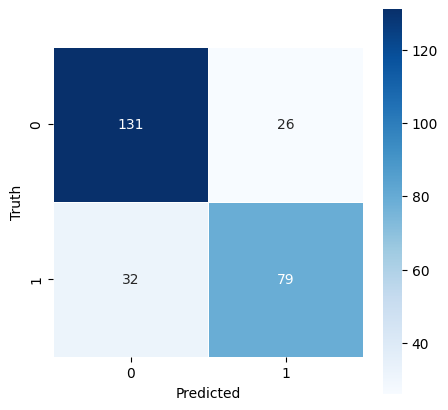

In [95]:
plt.figure (figsize = (5,5))
sns.heatmap(cm, annot = True, cbar=True, linewidths=0.5, cmap='Blues', square=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [98]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7835820895522388


In [99]:
# df.to_csv('./datasets/titanic_clean.csv', index=False, header=True)